In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
train = pd.read_csv('.//training_set_features.csv', index_col='respondent_id')
labels = pd.read_csv('./training_set_labels.csv', index_col='respondent_id')['h1n1_vaccine']
test_features = pd.read_csv('./test_set_features.csv', index_col='respondent_id')


In [15]:
num_cols = train.select_dtypes('number').columns

cat_cols = ['race', 'sex',
            'marital_status', 'rent_or_own', 'hhs_geo_region',
            'census_msa', 'employment_industry', 'employment_occupation']

ord_cols = ['age_group', 'education', 'income_poverty',
            'employment_status']
# Impute train
for col in num_cols:
    train[col] = train[col].fillna(value=-1)
for col in (cat_cols + ord_cols):
    train[col] = train[col].fillna(value='missing')

# Impute test
for col in num_cols:
    test_features[col] = test_features[col].fillna(value=-1)
for col in (cat_cols + ord_cols):
    test_features[col] = test_features[col].fillna(value='missing')

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

objList = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
           'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']
for feat in objList:
    train[feat] = le.fit_transform(train[feat].astype(str))
for feat in objList:
    test_features[feat] = le.fit_transform(test_features[feat].astype(str))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [28]:
from sklearn.ensemble import AdaBoostRegressor

ypoints = []
for i in range(1, 101):
    regressor = AdaBoostRegressor(n_estimators=100*i, random_state=100, learning_rate=0.01)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    from sklearn import metrics

    # print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    # print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    # print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    score = metrics.roc_auc_score(y_test, y_pred)
    print(i, ' Roc Auc Score:', score)
    ypoints.append(score)

1  Roc Auc Score: 0.8385323433258536
2  Roc Auc Score: 0.8401313356696838
3  Roc Auc Score: 0.8406774996008034
4  Roc Auc Score: 0.8428475531351637
5  Roc Auc Score: 0.8428475531351637


KeyboardInterrupt: 

In [31]:
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBClassifier
ypoints = []
for i in range(1, 101):
    regressor = XGBClassifier(n_jobs=-1,
                                            silent=0,
                                            verbose=True,
                                            # eval_metric = ["auc","error"],
                                            objective='multi:softprob',
                                            # nclasses=2,
                                            num_class=2,
                                            learning_rate=0.05,
                                            colsample_bylevel=0.20,
                                            colsample_bynode=0.20,
                                            colsample_bytree=0.20,
                                            min_child_weight=5,
                                            max_depth=12,
                                            subsample=1,
                                            n_estimators=100)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    from sklearn import metrics

    # print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    # print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    # print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    score = metrics.roc_auc_score(y_test, y_pred)
    print(i, ' Roc Auc Score:', score)
    ypoints.append(score)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/ahmetselimpehlivan/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/ahmetselimpehlivan/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [19]:
    regressor = GradientBoostingRegressor(n_estimators=200, random_state=100)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    from sklearn import metrics

    # print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    # print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    # print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    score = metrics.roc_auc_score(y_test, y_pred)
    print(i, ' Roc Auc Score:', score)
    ypoints.append(score)

100  Roc Auc Score: 0.8694536889964619


In [20]:
from sklearn import metrics

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = metrics.roc_auc_score(y_test, y_pred)
print(' Roc Auc Score:', score)
ypoints.append(score)

 Roc Auc Score: 0.8694536889964619


ValueError: x and y must have same first dimension, but have shapes (100,) and (102,)

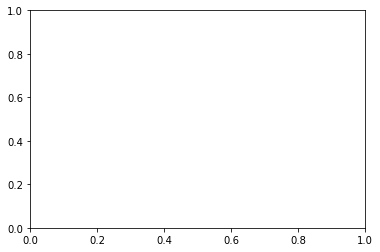

In [21]:
# test_pred = regressor.predict(test_features)

# print(test_pred)
xpoints = np.arange(1, 101)

plt.plot(xpoints, ypoints)
plt.title("Curve plotted using the given points")
plt.xlabel("Number of Estimators")
plt.ylabel("Test Accuracies")
plt.show()
